In [1]:
import numpy as np
from statistics import mode
from pprint import pprint
from tqdm import tqdm_notebook
import math
from matplotlib import pyplot
from collections import Counter

In [2]:
def euclidian_distance(vector1, vector2):
    temp = sum([(i-j)**2 for i,j in zip(vector1,vector2)])
    return math.sqrt(temp)

In [3]:
class KNN:
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    def fit(self,X, y):
        self.X = X
        self.y = y
    
    def predict(self,vector, k):
        distances = []
        for i in self.X:
            distances.append(euclidian_distance(vector,i))
        closest_items=None
        flag = True
        
        argsorted_distances = np.argsort(distances).tolist()

        while True:
            closest_items = argsorted_distances[:k]

            classes = [self.y[i] for i in closest_items]
            try:
                return mode(classes)
            except:
                exit()
                k= k+1
                print('Multiple classes were equally likely, increase count of k to ',k)
            if k<len(closest_items):
                flag = False
    
    def visualise(self):
        pyplot.clf()
        if len(self.X[0])!=2:
            raise Exception('Data is of not 2d so cannot visualise')
        
        markers = ['P','v','*','s','X']

        for i in range(len(self.X)):            
            x_1, y_1 = self.X[i]
            color_select = self.y[i]
            pyplot.scatter(x_1, y_1, c=self.colors[color_select])
        pyplot.legend()
        
    def predict_visualise(self, vector, k):
        pyplot.clf()
        if len(self.X[0])!=2:
            raise Exception('Data is of not 2d so cannot visualise')
        
        markers = ['P','v','*','s','X']

        for i in range(len(self.X)):            
            x_1, y_1 = self.X[i]
            color_select = self.y[i]
            pyplot.scatter(x_1, y_1, c=self.colors[color_select])
        
        pyplot.scatter(vector[0],vector[1],marker = '*',c='k')
        
        distances = []
        for i in self.X:
            distances.append(euclidian_distance(vector,i))
        closest_items=None
        flag = True
        argsorted_distances = np.argsort(distances).tolist()
        while True:
            closest_items = argsorted_distances[:k]
                
            classes = [self.y[i] for i in closest_items]
            
            for i in closest_items:
                pyplot.plot([vector[0],self.X[i][0]], [vector[1],self.X[i][1]], 'k-', lw=2, c=self.colors[self.y[i]])
            
            try:
                return mode(classes)
            except:
                exit()
                k= k+1
                print('Multiple classes were equally likely, increase count of k to ',k)
            if k<len(closest_items):
                flag = False

In [4]:
import random
def generate_data(data_points=10, features=2, feature_range=(0,100),classes=3):
    
    X = []
    for i in range(data_points):
        temp = random.sample(range(feature_range[0],feature_range[1]), features)
        X.append(temp)
    
    y = [random.randrange(classes) for i in range(data_points)]
    return X, y

In [5]:
X, y = generate_data(data_points=50, classes=4)

No handles with labels found to put in legend.


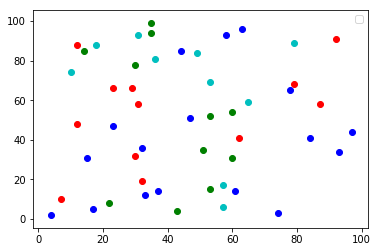

In [6]:
model = KNN()
model.fit(X,y)
model.visualise()

3

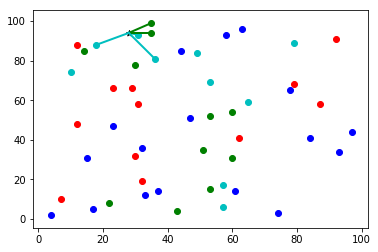

In [7]:
#model.predict([9,50],3)
test = random.sample(range(100),2)
model.predict_visualise(test,5)

In [8]:
model.colors

['b', 'g', 'r', 'c', 'm', 'y']

In [9]:
# model.colors

# Iris Dataset

In [10]:
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

In [11]:
train = []
test = []
overall = []
import csv

import pandas as pd

df = pd.read_csv('iris.csv', names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()
#df.values.tolist()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['class'] = df['class'].map(lambda x: classes.index(x))

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris_X=df[['sepal_length','sepal_width','petal_length','petal_width']].values.tolist()
iris_y=df['class'].values.tolist() 

In [16]:

#train_X, train_y

In [33]:
selected_sample = random.sample(range(len(iris_y)), int(len(iris_y)*0.8))

sample

In [34]:
def elements_at_index(list1,index):
    data=[]
    for i in index:
        data.append(list1[i])
    return data

In [35]:
train_X, train_y = elements_at_index(iris_X, selected_sample), elements_at_index(iris_y, selected_sample)

In [36]:
model2= KNN()
model2.fit(train_X,train_y)
print(train_y)

[1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2]


In [37]:
non_selected_sample = [i for i in range(len(iris_y)) if i not in selected_sample]

In [38]:
success_count = 0
fail_count = 0
for i in non_selected_sample:
    if model2.predict(iris_X[i],9)==iris_y[i]:
        success_count+=1
    else:
        fail_count+=1

In [40]:
print('total =',len(non_selected_sample),'success=',success_count, 'fail_count=',fail_count, 'accuracy=',100*success_count/(len(non_selected_sample)))

total = 30 success= 28 fail_count= 2 accuracy= 93.33333333333333
